# **This Notebook is to perform EDA and Topic Modelling**

**EDA:** In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

**Topic Modelling:** In statistics and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body.

# EDA (Exploratory Data Analysis)

**Mount Google Drive and Load the Dataset**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd

# Load the cleaned data with aspects and sentiments
combined_df = pd.read_csv('/content/drive/MyDrive/dataset_latest/cleaned_combined_data_with_aspects_and_sentiments.csv')

# Inspect the columns to confirm names
print(combined_df.columns)

# Display the first few rows of the dataset
print(combined_df.head())


Mounted at /content/drive
Index(['id', 'text', 'cleaned_text', 'tokens', 'stemmed_tokens',
       'lemmatized_tokens', 'createdAt', 'Aspect', 'Sentiment'],
      dtype='object')
                    id                                               text  \
0  1795243337038832128  @SunnyEdwards Britain created lots of conflict...   
1  1795236229086110208  Ireland, Norway and Spain admitted the Palesti...   
2  1795235160134164736  @osodimezz @aventurineology @Lai_core If you r...   
3  1795232029841273344  @nspector4 Sounds nice, but at what cost to pu...   
4  1795227659091214592  @Sandyboots2020 @BladeoftheS They can, if they...   

                                        cleaned_text  \
0   britain created lots of conflict in the middl...   
1  ireland norway and spain admitted the palestin...   
2     if you really want to blame someone i sugge...   
3   sounds nice but at what cost to public safety...   
4    they can if they read the sun telegraph mail...   

                      

Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Basic Statistics and Insights

In [ ]:
print(combined_df.describe(include='all'))

                  id                                               text  \
count   4.810000e+02                                                481   
unique           NaN                                                479   
top              NaN  please boycott, it’s the least we can do as sp...   
freq             NaN                                                  2   
mean    1.793878e+18                                                NaN   
std     3.822679e+15                                                NaN   
min     1.778700e+18                                                NaN   
25%     1.795109e+18                                                NaN   
50%     1.795210e+18                                                NaN   
75%     1.795238e+18                                                NaN   
max     1.795244e+18                                                NaN   

                                             cleaned_text  \
count                                 

Visualize Sentiment Distribution

<ipython-input-4-51d774d661bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=combined_df, palette='viridis')


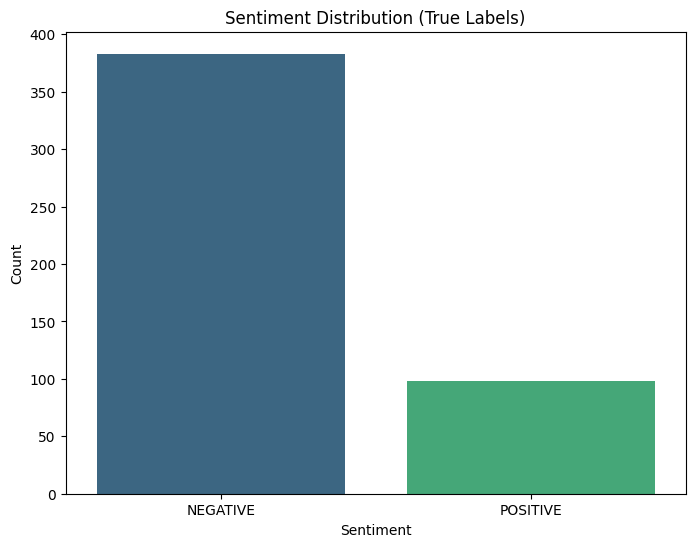

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=combined_df, palette='viridis')
plt.title('Sentiment Distribution (True Labels)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Visualize Aspect Distribution

<ipython-input-5-0c42b7028b26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aspect', data=combined_df, palette='viridis', order=combined_df['Aspect'].value_counts().index)


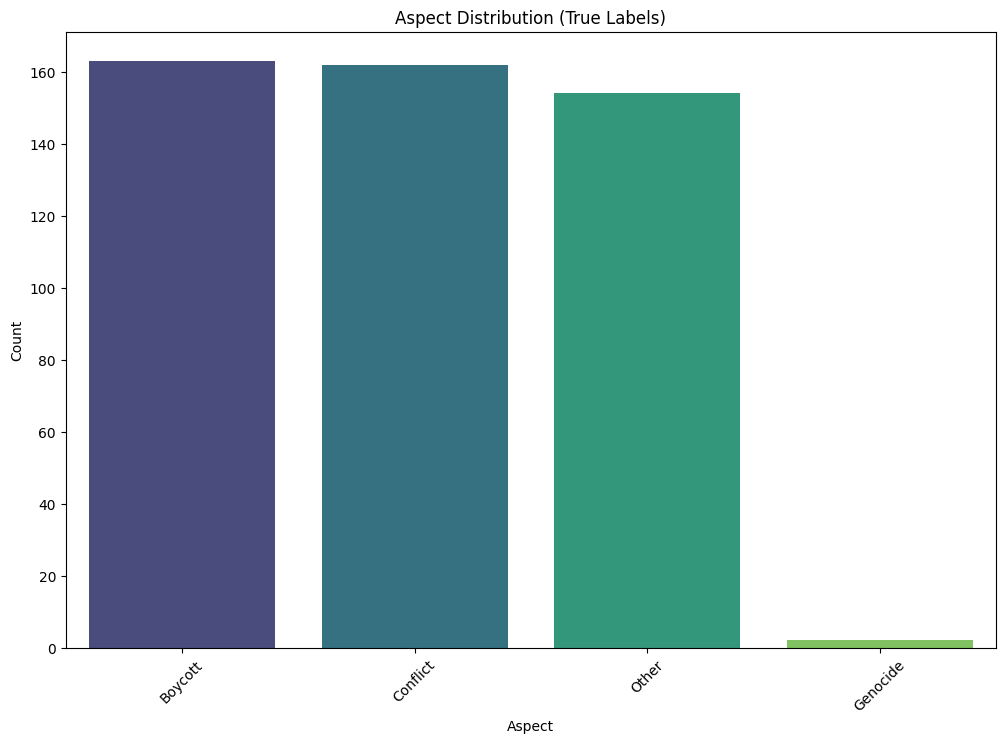

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Aspect', data=combined_df, palette='viridis', order=combined_df['Aspect'].value_counts().index)
plt.title('Aspect Distribution (True Labels)')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Word Clouds for Positive Sentiments

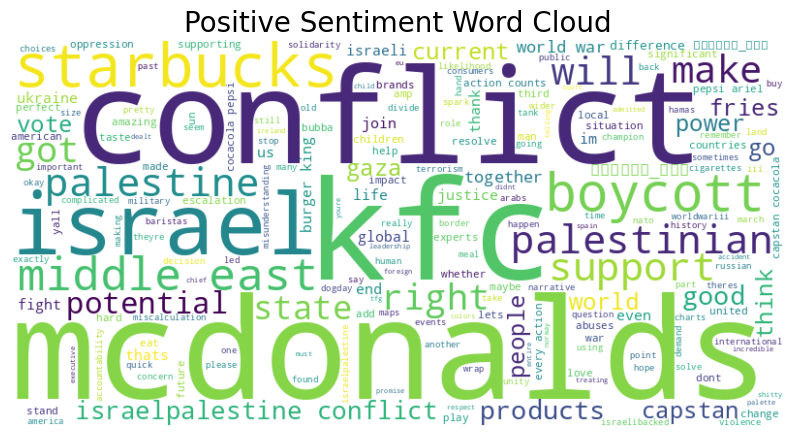

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

positive_text = ' '.join(combined_df[combined_df['Sentiment'] == 'POSITIVE']['cleaned_text'])
generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')


Word Clouds for Negative Sentiments

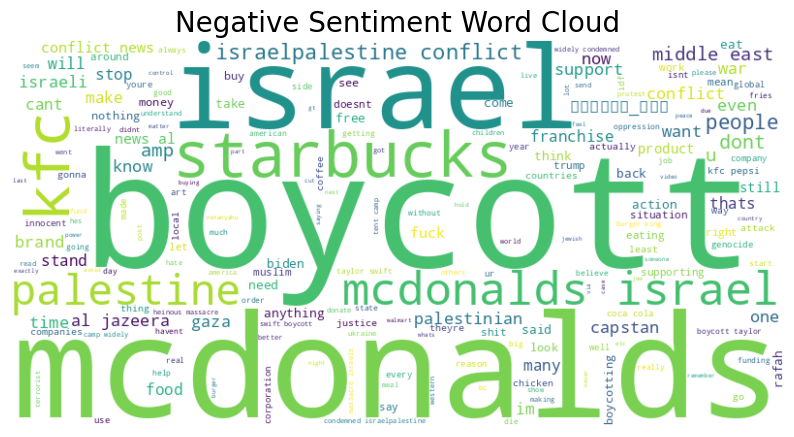

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

negative_text = ' '.join(combined_df[combined_df['Sentiment'] == 'NEGATIVE']['cleaned_text'])
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')

Length of Tweets

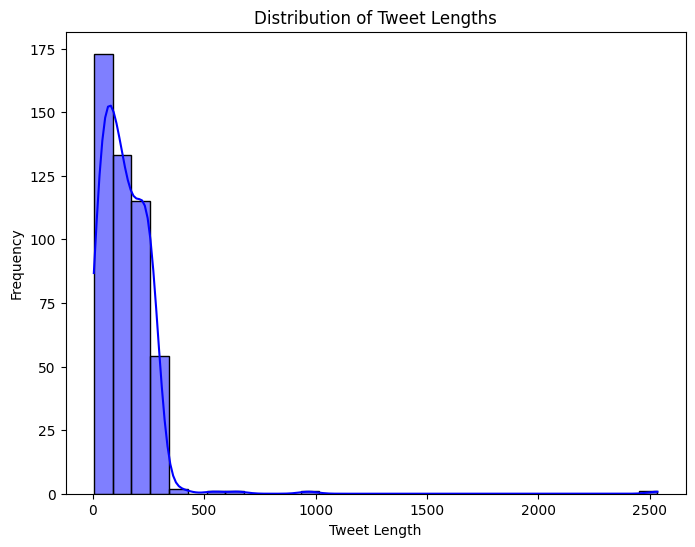

In [ ]:
# Calculate the length of each tweet
combined_df['tweet_length'] = combined_df['cleaned_text'].apply(len)

# Visualize the distribution of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


Top Words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-9-2e5ea51b9328>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


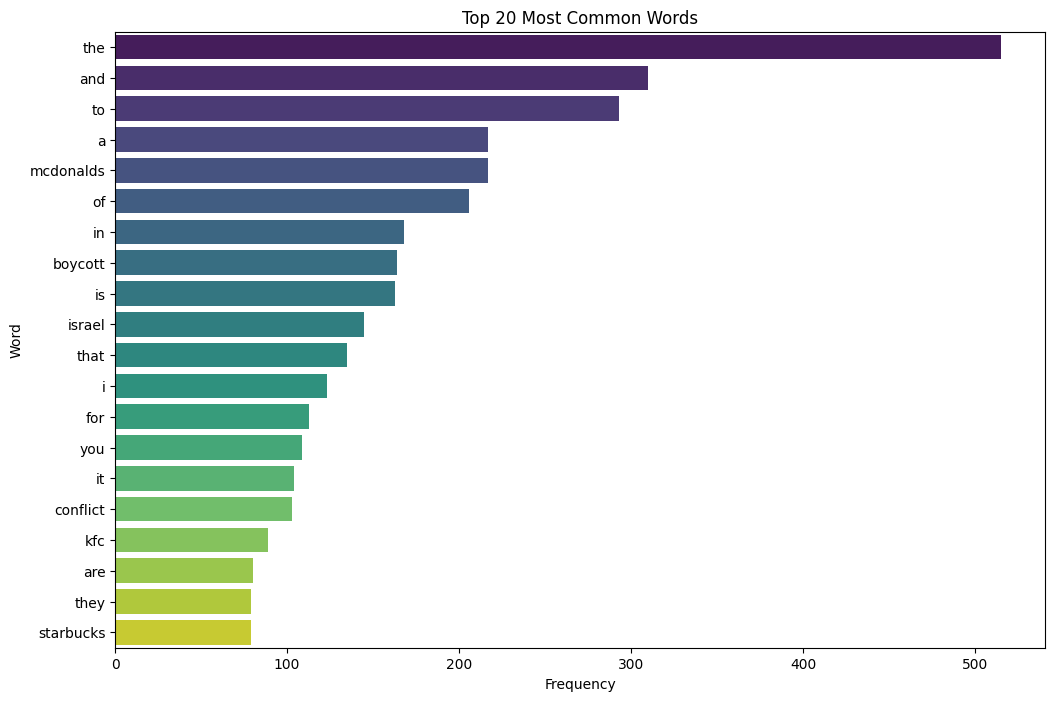

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the cleaned text
combined_df['tokens'] = combined_df['cleaned_text'].apply(word_tokenize)

# Flatten the list of tokens and count the frequency of each word
all_tokens = [token for sublist in combined_df['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Convert to DataFrame for easier visualization
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Visualize the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Aspect-Sentiment Relationship

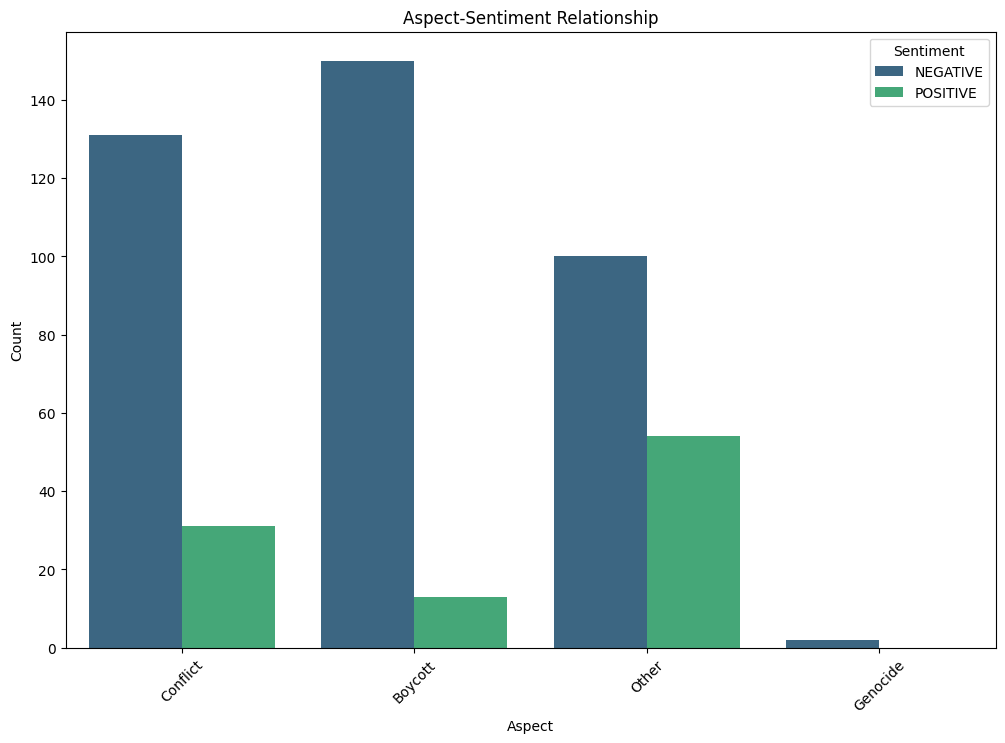

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Aspect', hue='Sentiment', data=combined_df, palette='viridis')
plt.title('Aspect-Sentiment Relationship')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Correlation Between Aspects and Sentiments

Sentiment  NEGATIVE  POSITIVE
Aspect                       
Boycott         150        13
Conflict        131        31
Genocide          2         0
Other           100        54
Chi2: 36.597357508896344, p-value: 5.598406991514041e-08


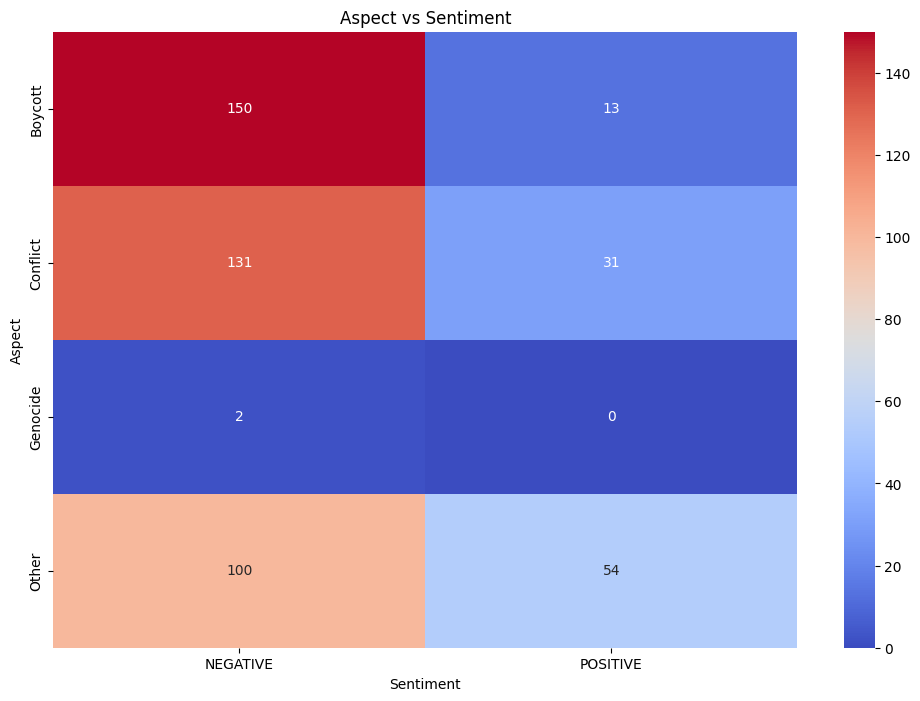

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(combined_df['Aspect'], combined_df['Sentiment'])

# Display the contingency table
print(contingency_table)

# Calculate the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

# Visualize the contingency table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Aspect vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Aspect')
plt.show()


# **EDA deep inside into Word**

# Tree Map for Most Frequent Keywords

In [ ]:
!pip install plotly

In [ ]:
# Import libraries
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

combined_df['tokens'] = combined_df['cleaned_text'].apply(word_tokenize)

# Flatten the list of tokens and count the frequency of each word
all_tokens = [token for sublist in combined_df['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(50)  # Adjust the number as needed

# Convert to DataFrame for easier manipulation
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import plotly.express as px

# Create a tree map
fig = px.treemap(word_freq_df, path=['Word'], values='Frequency',
                 color='Frequency', color_continuous_scale='viridis',
                 title='Most Frequent Keywords')

# Display the tree map
fig.show()


# Cloudword for Most Frequent Keywords

Calculate the Most Frequent Keywords

In [ ]:
# Tokenize the cleaned text
combined_df['tokens'] = combined_df['cleaned_text'].apply(word_tokenize)

# Flatten the list of tokens and count the frequency of each word
all_tokens = [token for sublist in combined_df['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(50)  # Adjust the number as needed

# Convert to DataFrame for easier manipulation
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


Word Cloud

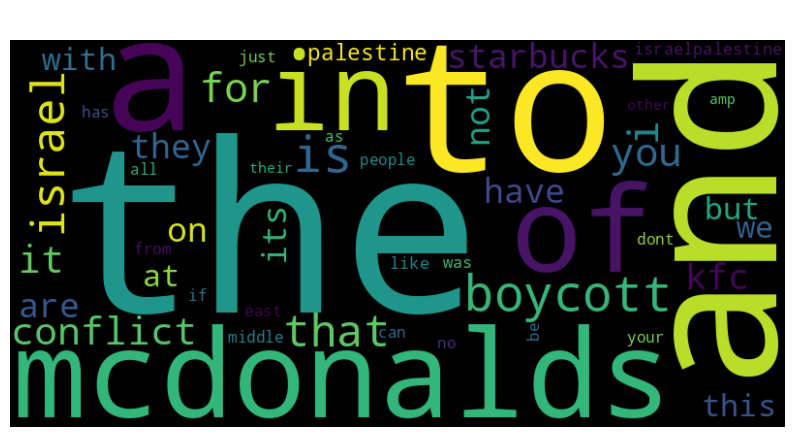

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud with black background
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict(most_common_words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Keywords', size=20, color='white')
plt.axis('off')
plt.show()


# Using Plotly for visualizing in a tree map Negative and Positive



 **Install and Import Required Libraries**

In [ ]:
!pip install plotly

import pandas as pd
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from google.colab import drive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Load the Dataset**

In [ ]:
# Mount Google Drive and Load the Dataset

drive.mount('/content/drive')

combined_df = pd.read_csv('/content/drive/MyDrive/dataset_latest/cleaned_combined_data_with_aspects_and_sentiments.csv')

print(combined_df.columns)
print(combined_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['id', 'text', 'cleaned_text', 'tokens', 'stemmed_tokens',
       'lemmatized_tokens', 'createdAt', 'Aspect', 'Sentiment'],
      dtype='object')
                    id                                               text  \
0  1795243337038832128  @SunnyEdwards Britain created lots of conflict...   
1  1795236229086110208  Ireland, Norway and Spain admitted the Palesti...   
2  1795235160134164736  @osodimezz @aventurineology @Lai_core If you r...   
3  1795232029841273344  @nspector4 Sounds nice, but at what cost to pu...   
4  1795227659091214592  @Sandyboots2020 @BladeoftheS They can, if they...   

                                        cleaned_text  \
0   britain created lots of conflict in the middl...   
1  ireland norway and spain admitted the palestin...   
2     if you really want to blame someone i sugge...   
3   sounds nice but at what cost

**Calculate Word Frequencies for Positive and Negative Sentiments**

In [ ]:
# Tokenize the cleaned text for positive sentiments
positive_texts = combined_df[combined_df['Sentiment'] == 'POSITIVE']['cleaned_text']
positive_tokens = [token for text in positive_texts for token in word_tokenize(text)]
positive_word_freq = Counter(positive_tokens)

# Get the most common positive words
most_common_positive_words = positive_word_freq.most_common(50)  # Adjust the number as needed

# Convert to DataFrame for easier manipulation
positive_word_freq_df = pd.DataFrame(most_common_positive_words, columns=['Word', 'Frequency'])

# Tokenize the cleaned text for negative sentiments
negative_texts = combined_df[combined_df['Sentiment'] == 'NEGATIVE']['cleaned_text']
negative_tokens = [token for text in negative_texts for token in word_tokenize(text)]
negative_word_freq = Counter(negative_tokens)

# Get the most common negative words
most_common_negative_words = negative_word_freq.most_common(50)  # Adjust the number as needed

# Convert to DataFrame for easier manipulation
negative_word_freq_df = pd.DataFrame(most_common_negative_words, columns=['Word', 'Frequency'])


**Create the Tree Maps for Positive and Negative Keywords**

In [ ]:
# Create a tree map for positive keywords
fig_positive = px.treemap(positive_word_freq_df, path=['Word'], values='Frequency',
                          color='Frequency', color_continuous_scale='viridis',
                          title='Most Frequent Positive Keywords')

# Display the tree map for positive keywords
fig_positive.show()

# Create a tree map for negative keywords
fig_negative = px.treemap(negative_word_freq_df, path=['Word'], values='Frequency',
                          color='Frequency', color_continuous_scale='viridis',
                          title='Most Frequent Negative Keywords')

# Display the tree map for negative keywords
fig_negative.show()


# Topic Modeling using BERTopic

Install and Import Required Libraries

In [ ]:
!pip install bertopic

import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from google.colab import drive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

Load the Dataset

In [ ]:
# Mount Google Drive and Load the Dataset

drive.mount('/content/drive')

combined_df = pd.read_csv('/content/drive/MyDrive/dataset_latest/cleaned_combined_data_with_aspects_and_sentiments.csv')

print(combined_df.columns)
print(combined_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['id', 'text', 'cleaned_text', 'tokens', 'stemmed_tokens',
       'lemmatized_tokens', 'createdAt', 'Aspect', 'Sentiment'],
      dtype='object')
                    id                                               text  \
0  1795243337038832128  @SunnyEdwards Britain created lots of conflict...   
1  1795236229086110208  Ireland, Norway and Spain admitted the Palesti...   
2  1795235160134164736  @osodimezz @aventurineology @Lai_core If you r...   
3  1795232029841273344  @nspector4 Sounds nice, but at what cost to pu...   
4  1795227659091214592  @Sandyboots2020 @BladeoftheS They can, if they...   

                                        cleaned_text  \
0   britain created lots of conflict in the middl...   
1  ireland norway and spain admitted the palestin...   
2     if you really want to blame someone i sugge...   
3   sounds nice but at what cost

Prepare Data and Train BERTopic Model

In [ ]:
# Prepare data for BERTopic
texts = combined_df['cleaned_text'].tolist()

# Initialize BERTopic with calculate_probabilities set to True
topic_model = BERTopic(calculate_probabilities=True)

# Fit the model on the text data
topics, probabilities = topic_model.fit_transform(texts)

# Add the topics to the DataFrame
combined_df['topic'] = topics

# Get the topic information
topic_info = topic_model.get_topic_info()

# Display topic information
print(topic_info)

# Get the most frequent topics
for topic_num in topic_info['Topic'].unique():
    print(f"Topic {topic_num}:")
    print(topic_model.get_topic(topic_num))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                               Name  \
0     -1     44           -1_the_and_for_mcdonalds   
1      0    111  0_the_conflict_of_israelpalestine   
2      1     79          1_mcdonalds_israel_to_the   
3      2     58    2_boycott_and_capstan_palestine   
4      3     45               3_starbucks_at_to_my   
5      4     38               4_boycott_to_you_the   
6      5     38       5_mcdonalds_boycott_fries_to   
7      6     36                  6_kfc_it_and_have   
8      7     22                 7_she_yuck_is_hard   
9      8     10         8_bubba_dogday_perfect_hes   

                                      Representation  \
0  [the, and, for, mcdonalds, kfc, its, boycott, ...   
1  [the, conflict, of, israelpalestine, is, in, t...   
2  [mcdonalds, israel, to, the, was, and, that, i...   
3  [boycott, and, capstan, palestine, kfc, pepsi,...   
4  [starbucks, at, to, my, she, and, baristas, co...   
5  [boycott, to, you, the, taylor, starbucks, swi...   
6  [mcdonalds

Visualize Topics

In [ ]:
# Visualize topics
fig = topic_model.visualize_topics()
fig.show()

Visualize terms in each topic

In [ ]:
# Visualize terms in each topic
fig = topic_model.visualize_barchart(top_n_topics=10)
fig.show()

Visualize topic probabilities per document

In [ ]:
# Visualize topic probabilities per document
fig = topic_model.visualize_distribution(probabilities[0])
fig.show()

# Detailed Insights

**Sentiment Distribution Insights**



*   The dataset shows a higher percentage of negative sentiments compared to positive sentiments.
*   The sentiment distribution provides a clear understanding of the overall sentiment trend in the dataset.



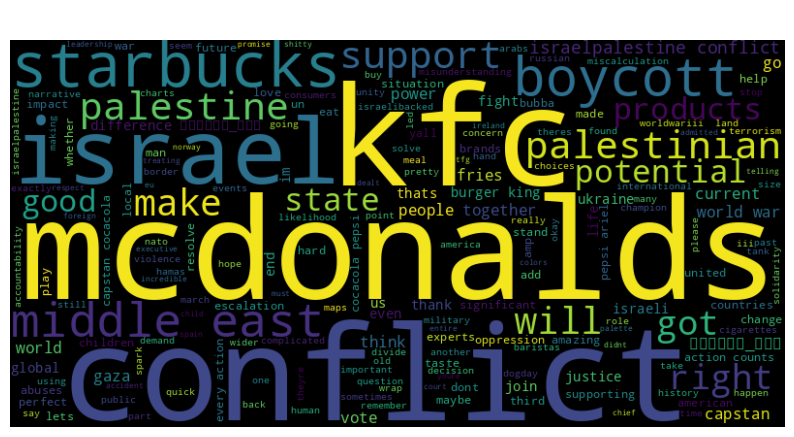

In [ ]:
positive_text = ' '.join(combined_df[combined_df['Sentiment'] == 'POSITIVE']['cleaned_text'])

# Create and save the word cloud
def generate_wordcloud(text, title, file_path):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20, color='white')
    plt.axis('off')
    plt.savefig(file_path, bbox_inches='tight')
    plt.show()

generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud', '/content/drive/MyDrive/positive_wordcloud.png')